In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt

In [12]:
from scripts.nEXO_event_processing import event_builder

builder = event_builder()
builder.set_filename('/Users/yumiao/Documents/Works/0nbb/nEXO/offline-samples/Baseline2019_bb0n_X0Y0Z-400mm_seed10_comsol.nEXOevents.root')
builder.get_mc_event(8)

builder.group_channels()

print(f'Total {len(builder.selected_coll_id)} collection strips and {len(builder.selected_other_id)} other strips.')

['SimEvent', 'SimEvent/nEXO::EventObject', 'SimEvent/nEXO::EventObject/TObject', 'SimEvent/nEXO::EventObject/TObject/fUniqueID', 'SimEvent/nEXO::EventObject/TObject/fBits', 'SimEvent/fGenTheta_p', 'SimEvent/fGenPhi_p', 'SimEvent/fGenE', 'SimEvent/fParentTrackID', 'SimEvent/fNeutronCount', 'SimEvent/fXe137Count', 'SimEvent/fInitNeutronEnergy', 'SimEvent/fPMT_Hits', 'SimEvent/fPMTID', 'SimEvent/fPMTs_fired', 'SimEvent/fmu_Impact_parameter', 'SimEvent/fn_Impact_parameter', 'SimEvent/fTotalEventEnergy_WT', 'SimEvent/fEnergyDeposit_WT', 'SimEvent/fLengthDeposit_WT', 'SimEvent/fNumDeposits_WT', 'SimEvent/fEventNumber', 'SimEvent/fGenX', 'SimEvent/fGenY', 'SimEvent/fGenZ', 'SimEvent/fGenParticleID', 'SimEvent/fGenKineticE', 'SimEvent/fTotalEventEnergy', 'SimEvent/fNumDeposits', 'SimEvent/fLengthDeposit', 'SimEvent/fEnergyDeposit', 'SimEvent/fPreEnergyDeposit', 'SimEvent/fPostEnergyDeposit', 'SimEvent/fTrackNumber', 'SimEvent/fXpos', 'SimEvent/fYpos', 'SimEvent/fZpos', 'SimEvent/fTglob', 'SimE

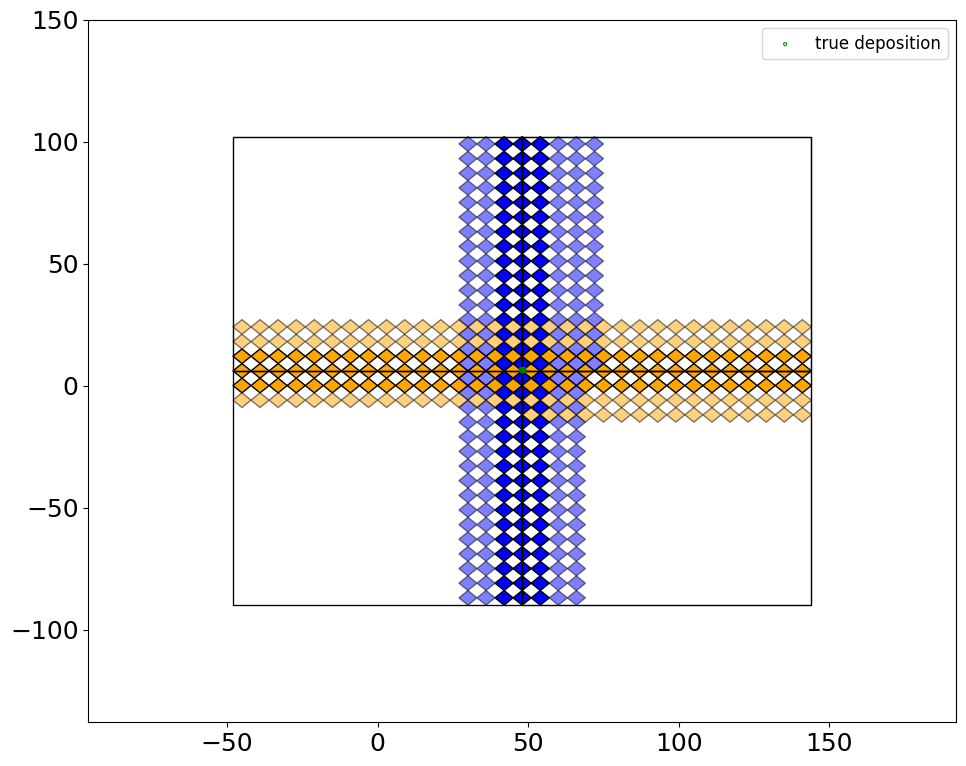

In [13]:
builder._plot_channels2D(truthDep=True)

In [14]:
cluster_x, cluster_y, cluster_E = builder.deposition_clustering(method='DBSCAN')

Estimated number of clusters: 1
Estimated number of noise points: 0


In [15]:
from scripts.waveform_fit import fitter

fit = fitter(SamplingFrequency=2.0)
fit.load_diffusion_PDFs()

The diffusion PDFs loaded successfully!


In [16]:
from tqdm.notebook import tqdm

n_cluster = len(cluster_x)
init_par = []
for x, y, E in zip(cluster_x, cluster_y, cluster_E):
    init_par.append(x)
    init_par.append(y)
    init_par.append(10.)
    init_par.append(E)

init_par = np.array(init_par)

valid = False
counter = 0
while not valid :
    m = fit.multiChannel_variedCluster_fitting(builder.time_all, builder.wf_all, init_par, builder.strip_x_all, builder.strip_y_all, builder.ystrip_flag_all)
    valid = m.fmin.is_valid
    counter += 1
    init_par_new = []
    for val in init_par:
        val = np.random.uniform(val, 0.05*val)
        init_par_new.append(val)
    init_par_new = np.array(init_par_new)
    init_par = init_par_new
    if counter > 10:
        # Do not fit excess 10 times...
        valid = True

During minuit construction, there are 1 clusters.


In [32]:
from tqdm.notebook import tqdm

n_cluster = [4]
m_list = []

for n in tqdm(n_cluster):
    valid = False
    counter = 0
    while not valid:
        init_par = []
        for i in range(n):
            #init_par.append(np.random.uniform(np.mean(builder.x_cross)-1, np.mean(builder.x_cross)+1))
            #init_par.append(np.random.uniform(np.mean(builder.y_cross)-1, np.mean(builder.y_cross)+1))
            init_par.append(np.random.uniform(np.min(builder.x_cross), np.max(builder.x_cross)))
            init_par.append(np.random.uniform(np.min(builder.y_cross), np.max(builder.y_cross)))
            init_par.append(10)
            init_par.append(1.0/n)
        init_par = np.array(init_par)
        print(f'Total {len(init_par)/4} clusters are fitted now.')
        m = fit.multiChannel_variedCluster_fitting(builder.time_all, builder.wf_all, init_par, builder.strip_x_all, builder.strip_y_all, builder.ystrip_flag_all)

        valid = m.fmin.is_valid
        counter += 1
        if counter > 10:
            valid = True

    m_list.append(m)

  0%|          | 0/1 [00:00<?, ?it/s]

Total 4.0 clusters are fitted now.
During minuit construction, there are 4 clusters.
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder Iterations finish without convergence; Edm 4.95149e+08 Requested 0.0002
W VariableMetricBuilder No convergence; Edm 1.65001e+07 is above tolerance 0.002
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder Iterations finish without convergence; Edm 841.094 Requested 0.0002
W VariableMetricBuilder No convergence; Edm 841.094 is above tolerance 0.002
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder Iterations finish without convergence; Edm 841.094 Requested 0.0002
W VariableMetricBuilder No convergence; Edm 841.094 is above tolerance 0.002
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder Iterations finish without convergence; Edm 841.094 Requested 0.0002
W VariableMetricBuilder No convergence; Edm 841.094 is above tolerance 0.002
W VariableMetri

In [6]:
init_par

array([-7.07607551e-02, -7.78424876e-03,  4.49829636e+00,  4.82774533e-01,
       -1.17279851e+01, -9.21146480e-01,  1.27527486e+00,  3.00812611e-02,
       -2.36242453e+00, -1.41957808e+00,  9.20567782e+00,  2.28015421e-02])

In [17]:
m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.636e+04                  │              Nfcn = 117              │
│ EDM = 7.7e-05 (Goal: 0.0002)     │            time = 2.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │        Covariance APPROXIMATE        │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  48.067   │   0.005   │            │            │ 27.9557 │ 67.9557 │       │
│ 1 │ x1   │   6.294   │   0.005   │            │            │-13.7664 │ 26.2336 │       │
│ 2 │ x2   │  10.669   │   0.004   │            │            │    0    │   20    │       │
│ 3 │ x3   │  1.1691   │  0.0028   │            │            │    0    │    2    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────┐
│    │        x0        x1        x2        x3 │
├────┼─────────────────────────────────────────┤
│ x0 │  2.34e-05  0.001e-3  0.001e-3      0e-6 │
│ x1 │  0.001e-3  2.48e-05 -0.001e-3     -1e-6 │
│ x2 │  0.001e-3 -0.001e-3  1.37e-05      0e-6 │
│ x3 │      0e-6     -1e-6      0e-6  7.93e-06 │
└────┴─────────────────────────────────────────┘

In [7]:
# initial paramters for 1 cluster:
init_par = np.array([np.mean(builder.x_cross), np.mean(builder.y_cross), 10, 1.0])

In [8]:
m = fit.multiChannel_variedCluster_fitting(builder.time_all, builder.wf_all, init_par, builder.strip_x_all, builder.strip_y_all, builder.ystrip_flag_all)

During minuit construction, there are 1 clusters.


In [7]:
idx = 0
_ = fit.multiChannel_variedCluster_plotting(builder.time_all, builder.wf_all, m_list[idx].values, builder.strip_x_all, builder.strip_y_all, builder.ystrip_flag_all, builder.charge_all);

NameError: name 'm_list' is not defined

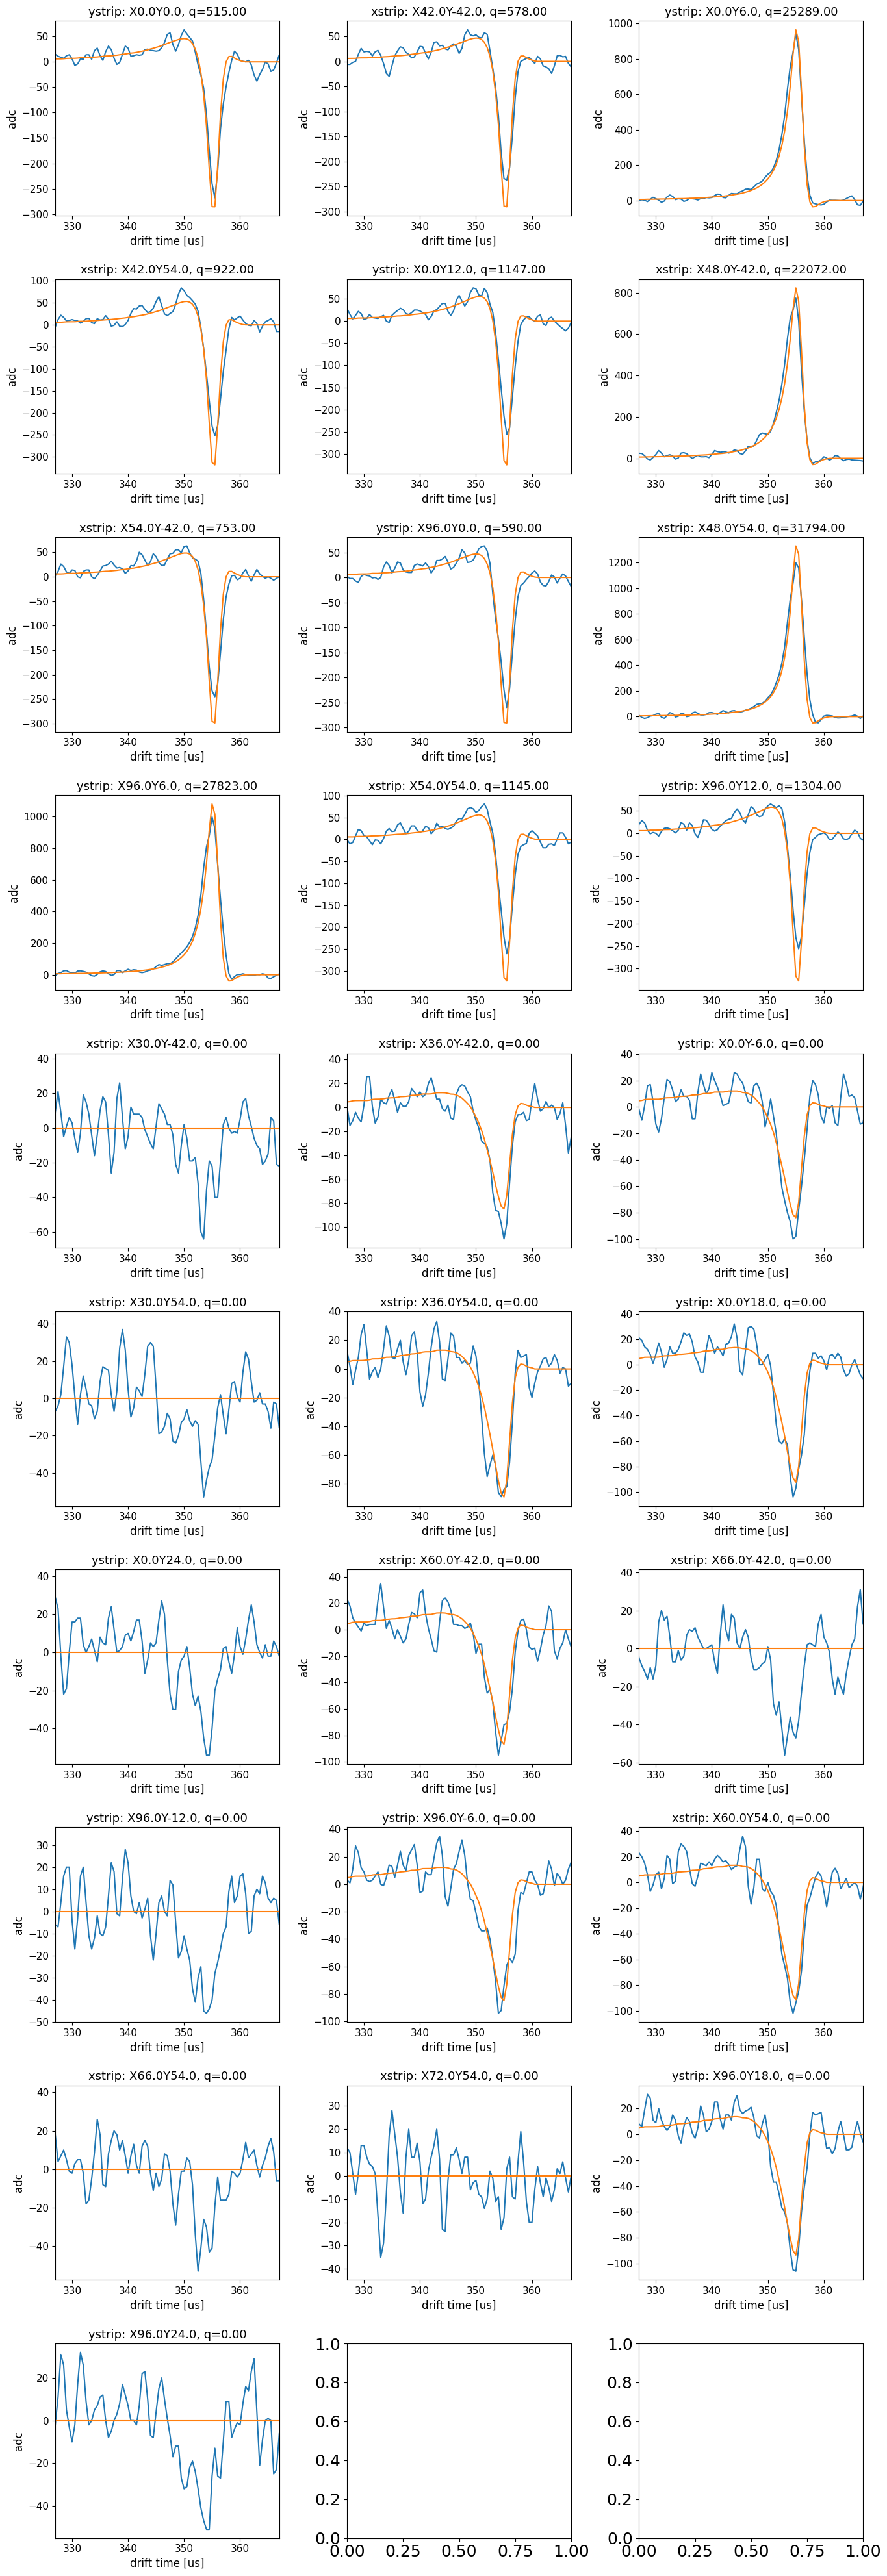

In [18]:
_ = fit.multiChannel_variedCluster_plotting(builder.time_all, builder.wf_all, m.values, builder.strip_x_all, builder.strip_y_all, builder.ystrip_flag_all, builder.charge_all);

In [11]:
import matplotlib.pyplot as plt
def compare_model_results(m_list):
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    for m in m_list:
        vals = m.values
        x = vals[::4]
        y = vals[1::4]
        t = vals[2::4]
        q = vals[3::4]
        print(f'Fitting charge is {np.sum(q)*1e5:.3f}.')
        ax[0, 0].hist(x, bins=10, histtype='step', label=f'{len(x)}-cluster')
        ax[0, 1].hist(y, bins=10, histtype='step', label=f'{len(x)}-cluster')
        ax[1, 0].hist(t, range=(9, 12),  bins=10, histtype='step', label=f'{len(x)}-cluster')
        ax[1, 1].hist(q, range=(0, 2),   bins=10, histtype='step', label=f'{len(x)}-cluster')

    ax[0, 0].set_xlabel('x [mm]', fontsize=13)
    ax[0, 1].set_xlabel('y [mm]', fontsize=13)
    ax[1, 0].set_xlabel('t [us]', fontsize=13)
    ax[1, 1].set_xlabel('q/1e5',  fontsize=13)
    ax[0, 0].tick_params(axis='both', labelsize=13)
    ax[0, 1].tick_params(axis='both', labelsize=13)
    ax[1, 0].tick_params(axis='both', labelsize=13)
    ax[1, 1].tick_params(axis='both', labelsize=13)
    ax[0, 0].legend(prop={'size':11})
    
    plt.tight_layout()
    
    return fig
            

In [19]:
print(f'The true charge of this event is {np.sum(builder.mc_event['q']):.3f}.')
q = m.values[3::4]
print(f'The fitting charge is {np.sum(q)*1e5:.3f}')
#compare_model_results(m_list);

The true charge of this event is 115730.617.
The fitting charge is 116905.421


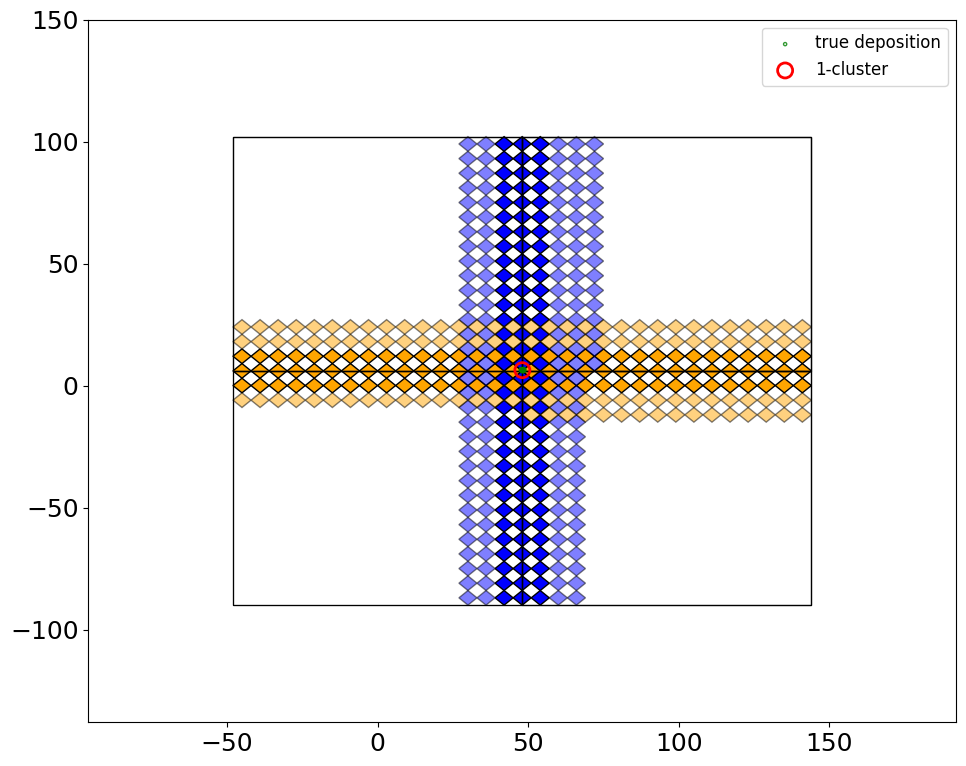

In [20]:
import numpy as np

fit_x, fit_y, fit_q = [], [], []
x, y, q = [], [], []
N_par = int(len(m.values) / 4)
for i_par in range(N_par):
    x.append(m.values[0+i_par*4])
    y.append(m.values[1+i_par*4])
    q.append(m.values[3+i_par*4])
x = np.array(x)
y = np.array(y)
q = np.array(q)
fit_x.append(x)
fit_y.append(y)
fit_q.append(q)
builder._plot_channels2D(fit_x, fit_y, fit_q, truthDep=True)